<a href="https://colab.research.google.com/github/jayesh-ingale/ML-Learning/blob/main/day4/scikit_learn%20classification_functions%20and%20regression_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [5]:
from sklearn.model_selection import train_test_split

In [16]:
heart_disease=pd.read_csv("/content/heart-disease.csv")

In [17]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#Split the dataset into X and y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Instantiate the model
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
clf.score(X_train,y_train)

1.0

In [19]:
clf.score(X_test,y_test)

0.8360655737704918

In [20]:
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()

In [21]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df["target"]=pd.Series(housing["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
from sklearn.ensemble import RandomForestRegressor
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
np.random.seed(42)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor(n_estimators=120)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=120)

In [23]:
model.score(X_test,y_test)

0.8067769508634096

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
np.mean(cross_val_score(clf,X,y,cv=5))

np.float64(0.811639344262295)

In [26]:
from sklearn.metrics import roc_curve
y_probs=clf.predict_proba(X_test)

In [27]:
y_probs=y_probs[:,1]

In [28]:
y_probs

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53, 0.74,
       0.3 , 0.89, 0.05, 0.97, 0.98, 0.99, 0.16, 0.05, 0.02, 0.49, 0.11,
       0.62, 0.71, 0.74, 0.66, 0.8 , 0.78, 0.17, 0.85, 0.06, 0.08, 0.04,
       0.38, 0.54, 0.11, 0.56, 0.84, 0.67, 0.92, 0.87, 0.83, 0.82, 0.62,
       0.68, 0.23, 0.61, 1.  , 0.17, 0.03, 0.15, 0.2 , 0.75, 0.75, 0.13,
       0.07, 0.29, 0.99, 0.13, 0.  , 0.14])

In [29]:
fpr,tpr,thresholds=roc_curve(y_test,y_probs)

In [30]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

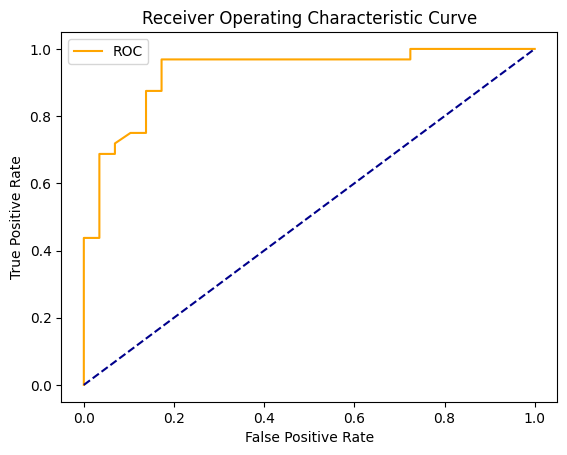

In [31]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic Curve")
  plt.legend()
  plt.show()
plot_roc_curve(fpr,tpr)

In [32]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]])

In [33]:
pd.crosstab(y_test,y_preds,rownames=["Actual Values"],colnames=["Predicted Values"])

Predicted Values,0,1
Actual Values,,
0,24,5
1,4,28


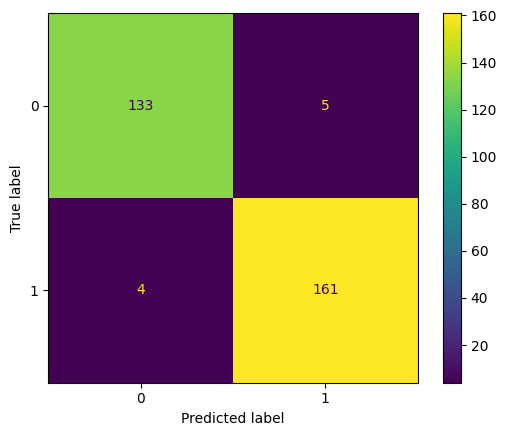

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y);

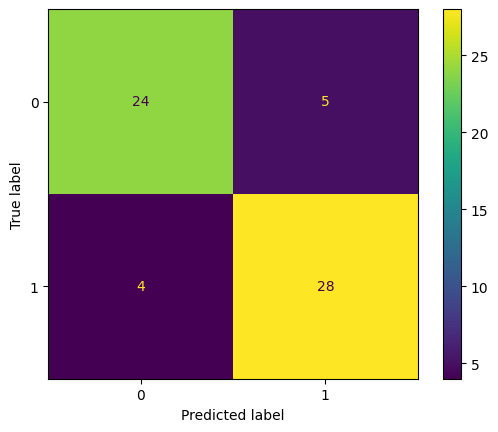

In [35]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds);

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(42)
clf=RandomForestClassifier(n_estimators=100)
cv_acc=cross_val_score(clf, X,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [37]:
np.mean(cv_acc)

np.float64(0.8248087431693989)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
model=RandomForestRegressor(n_estimators=80)
cv_r2=cross_val_score(model,X,y,cv=5,scoring=None)
np.mean(cv_r2)

np.float64(0.6514408141759134)

In [39]:
np.mean(cv_r2)

np.float64(0.6514408141759134)

In [40]:
##Scikit Learn CLassification Functions


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score , f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_preds=clf.predict(X_test)
print("Classifier Metrics")
print("Accuracy: ",accuracy_score(y_test,y_preds))
print("Recall: ",recall_score(y_test,y_preds))
print("Precision: ",precision_score(y_test,y_preds))
print("F1 Score: ",f1_score(y_test,y_preds))


Classifier Metrics
Accuracy:  0.8524590163934426
Recall:  0.875
Precision:  0.8484848484848485
F1 Score:  0.8615384615384616


In [42]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
print("R2 score : ",r2_score(y_test,y_preds))
print("MAE: ",mean_absolute_error(y_test,y_preds))
print("MSE: ",mean_squared_error(y_test,y_preds))


R2 score :  0.8066196804802649
MAE:  0.3265721842781009
MSE:  0.2534073069137548
